In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googleplay/Mobile_App_Success_Classification.csv


In [2]:
# Load the dataset, specifying the data types for each column
df = pd.read_csv('/kaggle/input/googleplay/Mobile_App_Success_Classification.csv', low_memory=False)


#  **Data Exploration**

In [3]:
# Checking the number of null values.
print(df.isnull().sum())

App Name           1022655
Category           1022655
Reviews            1022656
Installs           1022655
Size               1022655
Price              1022655
Content Rating     1022655
Last Updated       1022655
Minimum Version    1022655
Latest Version     1022656
App_Rating               0
dtype: int64


In [4]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   App Name         25920 non-null    object 
 1   Category         25920 non-null    object 
 2   Reviews          25919 non-null    float64
 3   Installs         25920 non-null    object 
 4   Size             25920 non-null    object 
 5   Price            25920 non-null    object 
 6   Content Rating   25920 non-null    object 
 7   Last Updated     25920 non-null    object 
 8   Minimum Version  25920 non-null    object 
 9   Latest Version   25919 non-null    object 
 10  App_Rating       1048575 non-null  object 
dtypes: float64(1), object(10)
memory usage: 88.0+ MB


In [5]:
# Generate a summary of descriptive statistics for the df 
print(df.describe())

            Reviews
count  2.591900e+04
mean   1.143561e+05
std    1.300996e+06
min    1.000000e+00
25%    1.480000e+02
50%    1.617000e+03
75%    1.671800e+04
max    8.621429e+07


In [6]:
# Show the column names
print(df.columns)

Index(['App Name', 'Category', 'Reviews', 'Installs', 'Size', 'Price',
       'Content Rating', 'Last Updated', 'Minimum Version', 'Latest Version',
       'App_Rating'],
      dtype='object')


In [7]:
# Show the number of rows and columns
print(df.shape)

(1048575, 11)


In [8]:
# Show the 1st 10 rows of data
print(df.head(10))

                                            App Name          Category  \
0                           DoorDash - Food Delivery    FOOD_AND_DRINK   
1  TripAdvisor Hotels Flights Restaurants Attract...  TRAVEL_AND_LOCAL   
2                                             Peapod          SHOPPING   
3                    foodpanda - Local Food Delivery    FOOD_AND_DRINK   
4                          My CookBook Pro (Ad Free)    FOOD_AND_DRINK   
5                            Safeway Online Shopping    FOOD_AND_DRINK   
6              Yelp: Food, Shopping, Services Nearby  TRAVEL_AND_LOCAL   
7                             Talabat: Food Delivery    FOOD_AND_DRINK   
8     Fast Food Locator | Worldwide Fast Food Finder  TRAVEL_AND_LOCAL   
9                          Allrecipes Dinner Spinner    FOOD_AND_DRINK   

     Reviews      Installs                Size   Price Content Rating  \
0   305034.0    5,000,000+  Varies with device       0       Everyone   
1  1207922.0  100,000,000+  Varies with

In [9]:
# find out the column with uncertain value "Varies with device"
for i in range(4,len(df.columns)):
    print (df.columns.values[i] + " " + str(df[df[df.columns.values[i]] == 'Varies with device'][df.columns.values[i]].count()))# print(df["Category"].describe())



Size 2695
Price 1
Content Rating 0
Last Updated 0
Minimum Version 1965
Latest Version 2097
App_Rating 0


# Data Cleaning

In [10]:
# Droping all nulss
df.dropna(inplace=True)


1. Pre-processing attribute "Category"

In [11]:
print(df["Category"].unique())


['FOOD_AND_DRINK' 'TRAVEL_AND_LOCAL' 'SHOPPING' 'LIFESTYLE' 'GAME_ACTION'
 'GAME_CASUAL' 'GAME_ROLE_PLAYING' 'GAME_PUZZLE' 'GAME_RACING'
 'GAME_ADVENTURE' 'GAME_ARCADE' 'GAME_STRATEGY' 'GAME_SPORTS'
 'GAME_SIMULATION' 'GAME_MUSIC' 'MUSIC_AND_AUDIO' 'FINANCE' 'EVENTS'
 'ENTERTAINMENT' 'EDUCATION' 'GAME_EDUCATIONAL' 'BOOKS_AND_REFERENCE'
 'NEWS_AND_MAGAZINES' 'PHOTOGRAPHY' 'VIDEO_PLAYERS' 'GAME_WORD'
 'ART_AND_DESIGN' 'GAME_TRIVIA' 'GAME_BOARD' 'BUSINESS' 'PRODUCTIVITY'
 'COMMUNICATION' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME' 'SOCIAL' 'BEAUTY'
 'GAME_CASINO' 'MAPS_AND_NAVIGATION' 'PERSONALIZATION' 'GAME_CARD' 'TOOLS'
 'SPORTS' 'AUTO_AND_VEHICLES' 'LIBRARIES_AND_DEMO' 'COMICS' 'PARENTING'
 'DATING' 'WEATHER' 'MEDICAL' ')' ' Channel 2 News']


In [12]:
df['Category'] = df['Category'].astype(str)
df['Category'] = df['Category'].str.strip().str.title()
df['Category'] = df['Category'].str.replace("_", " ", regex=True)
df['Category'] = df['Category'].str.replace(")", "NaN", regex=True)
df['Category'] = df['Category'].str.replace("Channel 2 News", 'NaN', regex=True)
df['Category'] = df['Category'].replace("NaN", np.nan, regex=True)


original_categories = df['Category'].unique()

# Assign numerical labels to the categorical values in the 'Category' column
df['Category']= pd.factorize(df.Category)[0]

In [13]:
print(df["Category"].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 -1]


2. Pre-processing  attribute "Installs"

In [14]:
print(df["Installs"].unique())


['5,000,000+' '100,000,000+' '100,000+' '10,000,000+' '10,000+'
 '1,000,000+' '50,000,000+' '500,000+' '50,000+' '5,000+' '1,000+'
 '500,000,000+' '1,000,000,000+' '5,000,000,000+' '100+' '500+' '50+' '5+'
 '10+' '1+' '6' '11976' '0+']


In [15]:
# Convert 'Installs' column to string type
df['Installs'] = df['Installs'].astype(str)

# Remove leading/trailing whitespaces
df['Installs'] = df['Installs'].str.strip()

# Remove characters '+' and ','
df['Installs'] = df['Installs'].str.replace('+', '', regex=True)
df['Installs'] = df['Installs'].str.replace(',', '', regex=True)

# Replace 'EDUCATION' with NaN in 'Installs' column
df['Installs'] = df['Installs'].replace("EDUCATION", np.nan)

# Convert 'Installs' column to numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert 'Installs' column to integer type
df['Installs'] = df['Installs'].astype('Int64')


In [16]:
print(df["Installs"].unique())


<IntegerArray>
[   5000000,  100000000,     100000,   10000000,      10000,    1000000,
   50000000,     500000,      50000,       5000,       1000,  500000000,
 1000000000, 5000000000,        100,        500,         50,          5,
         10,          1,          6,      11976,          0]
Length: 23, dtype: Int64


3. Pre-processing for attribute "Size"

In [17]:
print(df["Size"].unique())


['Varies with device' '1.4M' '16M' '23M' '4.1M' '39M' '8.1M' '19M' '30M'
 '11M' '14M' '38M' '15M' '55M' '7.8M' '17M' '62M' '22M' '25M' '46M' '9.5M'
 '78M' '13M' '72M' '81M' '44M' '24M' '99M' '37M' '63M' '45M' '20M' '34M'
 '79M' '35M' '36M' '54M' '40M' '90M' '97M' '27M' '82M' '58M' '43M' '64M'
 '47M' '50M' '33M' '84M' '89M' '69M' '52M' '101M' '71M' '66M' '12M' '18M'
 '56M' '9.3M' '3.4M' '48M' '31M' '51M' '49M' '21M' '4.8M' '4.7M' '26M'
 '32M' '2.9M' '9.4M' '10M' '76M' '93M' '3.0M' '41M' '29M' '42M' '94M'
 '75M' '4.0M' '73M' '2.4M' '7.7M' '9.7M' '6.6M' '2.7M' '57M' '59M' '8.4M'
 '8.6M' '70M' '6.1M' '8.3M' '2.0M' '7.0M' '2.5M' '28M' '6.9M' '7.1M'
 '5.7M' '4.4M' '686k' '4.3M' '4.2M' '3.6M' '8.7M' '3.3M' '7.3M' '10.0M'
 '7.6M' '1.7M' '98M' '4.5M' '6.5M' '65M' '6.2M' '80M' '85M' '86M' '9.1M'
 '68M' '2.6M' '87M' '88M' '9.2M' '74M' '4.6M' '103M' '96M' '5.2M' '116M'
 '6.3M' '91M' '111M' '83M' '53M' '431k' '3.9M' '2.2M' '77M' '100M' '110M'
 '60M' '9.6M' '9.0M' '7.9M' '6.0M' '5.6M' '3.7M' '5.0M' 

In [18]:
import numpy as np

df['Size'] = df['Size'].astype(str)

# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace("Varies with device", np.nan)

# Remove '+', ','
df['Size'] = df['Size'].str.replace("+", "", regex=True).str.replace(",", "", regex=True)

# Convert 'M' and 'm' to mega
df['Size'] = df['Size'].str.replace('[Mm]', '', regex=True)

# Check if value contains 'k' and divide by 1000
is_kilo = df['Size'].str.contains('[Kk]', regex=True, na=False)
df.loc[is_kilo, 'Size'] = df.loc[is_kilo, 'Size'].str.replace('[Kk]', '', regex=True).astype(float) / 1000

df['Size'] = df['Size'].astype(float)


In [19]:
print(df["Size"].unique())


[      nan 1.400e+00 1.600e+01 2.300e+01 4.100e+00 3.900e+01 8.100e+00
 1.900e+01 3.000e+01 1.100e+01 1.400e+01 3.800e+01 1.500e+01 5.500e+01
 7.800e+00 1.700e+01 6.200e+01 2.200e+01 2.500e+01 4.600e+01 9.500e+00
 7.800e+01 1.300e+01 7.200e+01 8.100e+01 4.400e+01 2.400e+01 9.900e+01
 3.700e+01 6.300e+01 4.500e+01 2.000e+01 3.400e+01 7.900e+01 3.500e+01
 3.600e+01 5.400e+01 4.000e+01 9.000e+01 9.700e+01 2.700e+01 8.200e+01
 5.800e+01 4.300e+01 6.400e+01 4.700e+01 5.000e+01 3.300e+01 8.400e+01
 8.900e+01 6.900e+01 5.200e+01 1.010e+02 7.100e+01 6.600e+01 1.200e+01
 1.800e+01 5.600e+01 9.300e+00 3.400e+00 4.800e+01 3.100e+01 5.100e+01
 4.900e+01 2.100e+01 4.800e+00 4.700e+00 2.600e+01 3.200e+01 2.900e+00
 9.400e+00 1.000e+01 7.600e+01 9.300e+01 3.000e+00 4.100e+01 2.900e+01
 4.200e+01 9.400e+01 7.500e+01 4.000e+00 7.300e+01 2.400e+00 7.700e+00
 9.700e+00 6.600e+00 2.700e+00 5.700e+01 5.900e+01 8.400e+00 8.600e+00
 7.000e+01 6.100e+00 8.300e+00 2.000e+00 7.000e+00 2.500e+00 2.800e+01
 6.900

4. Pre-processing attribute "Price"

In [20]:
print(df["Price"].unique())


['0' '$5.99 ' '$2.99 ' '$1.99 ' '$6.99 ' '$4.99 ' '$3.99 ' '$9.99 '
 '$0.99 ' '$3.49 ' '$13.99 ' '$7.99 ' '$4.95 ' '$5.49 ' '$39.99 ' '$8.99 '
 '$1.49 ' '$7.49 ' '$399.99 ' '$2.49 ' '$10.99 ' '$2.20 ' '$1.25 '
 '$11.99 ' '$14.99 ' '$74.99 ' '$99.99 ' '$9.00 ' '$24.99 ' '$10.00 '
 '$4.89 ' '$4.49 ' '$15.99 ' '$3.22 ' '$3.55 ' '$12.99 ' '$23.99 '
 '$3.75 ' '$6.49 ' '$19.99 ' '$3.95 ' '$32.99 ' '$1.26 ' '$21.00 '
 '$9.79 ' '$79.99 ' '$6.29 ' '$1.19 ' '$3.85 ' '$1.29 ' '$29.99 ' '$1.00 '
 '$3.29 ' '$54.99 ' '$1.40 ' '$4.00 ' '$5.00 ' '$2.00 ' '2.4M' '$1.05 '
 '$299.99 ' '$2.50 ' '$5.33 ' '$1.90 ' '$3.00 ' '$2.40 ' '$6.71 ' '$9.95 '
 '$14.01 ' '$22.99 ' '$2.79 ' '$1.20 ' '$1.09 ' '$9.49 ' '$31.99 '
 '$6.85 ' 'Varies with device' '$1.50 ' '$34.99 ' '$1.80 ' '$10.75 '
 '$45.99 ' '$17.99 ' '$5.76 ' '$5.74 ' '$14.73 ' '$27.99 ' '$8.80 '
 '$4.50 ' '$6.00 ' '$5.78 ' '$12.00 ' '$84.99 ' '$8.49 ' '$3.81 ']


In [21]:
df['Price'] = df['Price'].astype(str)

price_character = ['$', 'M']
for cr in price_character:
    df['Price'] = df['Price'].str.replace(cr, '', regex=True)
    
df['Price'] = df['Price'].replace("Varies with device", np.nan)

df['Price'] = df['Price'].astype(float)

In [22]:
print(df["Price"].unique())


[  0.     5.99   2.99   1.99   6.99   4.99   3.99   9.99   0.99   3.49
  13.99   7.99   4.95   5.49  39.99   8.99   1.49   7.49 399.99   2.49
  10.99   2.2    1.25  11.99  14.99  74.99  99.99   9.    24.99  10.
   4.89   4.49  15.99   3.22   3.55  12.99  23.99   3.75   6.49  19.99
   3.95  32.99   1.26  21.     9.79  79.99   6.29   1.19   3.85   1.29
  29.99   1.     3.29  54.99   1.4    4.     5.     2.     2.4    1.05
 299.99   2.5    5.33   1.9    3.     6.71   9.95  14.01  22.99   2.79
   1.2    1.09   9.49  31.99   6.85    nan   1.5   34.99   1.8   10.75
  45.99  17.99   5.76   5.74  14.73  27.99   8.8    4.5    6.     5.78
  12.    84.99   8.49   3.81]


5. Pre-processing attribute "Content Rating"

In [23]:
print(df["Content Rating"].unique())


['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 '$0.99 ' '0']


In [24]:
df['Content Rating'] = df['Content Rating'].astype(str)

df['Content Rating'] = df['Content Rating'].replace("Everyone 10+", "Everyone")
df['Content Rating'] = df['Content Rating'].replace("Mature 17+", "Mature")
df['Content Rating'] = df['Content Rating'].replace("Mature 17+", "Mature")
df['Content Rating'] = df['Content Rating'].replace("Adults only 18+", "Adults Only")

values_to_drop = ["$0.99", "0", "100,000+"]
df["Content Rating"] = df["Content Rating"].str.strip().replace(values_to_drop, np.nan)
df.dropna(inplace=True)
unique_content_rating = df["Content Rating"].unique()

# Assign numerical labels to the categorical values in the 'Content Rating' column
df['Content Rating']= pd.factorize(df['Content Rating'])[0]

In [25]:
print(df["Content Rating"].unique())


[0 1 2 3 4]


6. Pre-processing attribute "App_Rating"

In [26]:
print(df["App_Rating"].unique())



['Intermediate_Rating' 'High_Rating' 'Low_Rating']


In [27]:

df['App_Rating'] = df['App_Rating'].astype(str)
df['App_Rating'] = df['App_Rating'].str.strip()

df['App_Rating'] = df['App_Rating'].str.replace("_", ' ', regex=True)

# Assign numerical labels to the categorical values in the 'App Rating' column
df['App_Rating']=pd.factorize(df.App_Rating)[0]

In [28]:
print(df["App_Rating"].unique())


[0 1 2]


7. Pre-processing attribute "Reviews"

In [29]:

print(df["Reviews"].unique())



[  1967. 389154.   2559. ...  11214.  14039.   1796.]


In [30]:
df['Reviews'] = df['Reviews'].replace('Varies with device', np.nan, regex=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



In [31]:
print(df["Reviews"].unique())


[  1967. 389154.   2559. ...  11214.  14039.   1796.]


8. Pre-processing attribute "Last Updated"

In [32]:
print(df["Last Updated"].unique())

['20-Sep-18' '22-Mar-19' '29-Mar-19' ... '30-Jan-13' '27-May-15'
 '28-Feb-17']


In [33]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Day Last Updated'] = df['Last Updated'].dt.day
df['Month Last Updated'] = df['Last Updated'].dt.month
df['Year Last Updated'] = df['Last Updated'].dt.year

df.drop('Last Updated', axis=1, inplace=True)



In [34]:
print(df["Day Last Updated"].unique())


[20 22 29 10 27  7 21 28  1  2 26 15 31  3 18  6 14 30 25  9 23 13 12 11
  4  5 19 24 17 16  8]


In [35]:
print(df["Month Last Updated"].unique())


[ 9  3  2  4 11 12  5  6  8  1 10  7]


In [36]:
print(df["Year Last Updated"].unique())

[2018 2019 2017 2016 2015 2014 2011 2013 2012 2010]


9. Pre-processing attribute "Minimum Version"

In [37]:
print(df["Minimum Version"].unique())


['5.0 and up' '4.2 and up' '4.3 and up' '4.0 and up' '4.0.3 and up'
 '4.4 and up' 'Varies with device' '4.1 and up' '5.1 and up' '6.0 and up'
 '2.3 and up' '7.0 and up' '2.1 and up' '2.2 and up' '2.3.3 and up'
 '1.6 and up' '3.1 and up' '2.0 and up' '3.0 and up' '1.5 and up'
 '2.0.1 and up' '8.0 and up' '7.1 and up' '1.1 and up' '3.2 and up'
 '4.4W and up' '4.1 - 7.1.1' '4.0 - 5.1' '4.1 - 8.0' '1.0 and up'
 '4.2 - 8.0']


In [38]:
df['Minimum Version'] = df['Minimum Version'].astype(str)
df['Minimum Version'] = df['Minimum Version'].replace('Varies with device', np.nan)
df['Minimum Version'] = df['Minimum Version'].str.replace('W', "", regex=True)

# Splits on the first accurance of space 
df['Minimum Version'] = df['Minimum Version'].str.split().str[0]

df['Minimum Version'] = pd.to_numeric(df['Minimum Version'], errors='coerce')
# df.dropna(inplace=True)


In [39]:
print(df["Minimum Version"].unique())


[5.  4.2 4.3 4.  nan 4.4 4.1 5.1 6.  2.3 7.  2.1 2.2 1.6 3.1 2.  3.  1.5
 8.  7.1 1.1 3.2 1. ]


10. Pre-processing attribute "Latest Version"

In [40]:
# print(df["Latest Version"].unique())
unique_versions = df["Latest Version"].unique().tolist()
print(unique_versions)


['2.2.0', '4.18.2', '7.6.0', '2.4', '6.7', '25.5.0', '6.1.0', '7.3', '5.1.3.0-google', '2.106.4.0-android', '2.1.2', 'v42 (March 15, 2019)', '4.17.0', '2.61', '19.11', '2.5.7', '10.13.1.2500', '5.23.0', '3.20.0.0', '4.0.41', '19.14.0.7', '1.2.20', '3.4', '5.17.3', '5.1.5', '1.12.0', '4.0.0.429', '5.8.4', '6.1.2', '1.0.8', '4.1.1', '1.38.7', '1.5', '1.0.4', '0.7.2', '0.2.6', '1', '1.0.1', '1.1.0', '1.1.9', '1.0.3', '1.1.8', '1.0.2', '1.3.4', '1.4.1', '1.4.3', '1.6.0', '1.1.4', '1.2.0', '1.0.6', '2.0.8', '1.6.1', '1.0.12', '1.01.01', '2.05', '1.1', '1.0.9', '1.18', '1.0.3156', '1.2.8', '0.5', '1.0.7', '1.0.35', '0.4', '1.3', '1.05', '1.2.1', '1.5.6', '1.5.2', '1.0.152', '1.4', '1.0.90.030400', '1.1.11', '0.0.5', '0.0.0.1', '1.0.0', '8', '3.19.2', '2.2.2', '4.28.1', '1.34.1.7118', '3.3.9', '1.9.6.0', '3.1.9', '4.0.7', '5.6.0', '9.16.0', '4.92', '2.7', '2.45.0', '7.2.1', '11.2.15', '3.4.7', '8.1.8', '2.17', '1.4.11', '2.46.4', '5.11.1.0', '20.2', '1.24.0', '3.7.9', '5.4.3', '1.1.16', '5.2'

In [41]:
# Remove any alphabetices characters available
df['Latest Version'] = df['Latest Version'].str.split()
df['Latest Version'] = df['Latest Version'].astype(str)
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
             'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for cr in alphabets:
     df['Latest Version'] = df['Latest Version'].replace(cr, '', regex=True)
        

        

In [42]:
# Remove any special characters available
special_chars = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
for char in special_chars:
    df['Latest Version'] = df['Latest Version'].str.replace(char, '', regex=True)

df['Latest Version'] = df['Latest Version'].replace('', np.nan)
    
df['Latest Version'] = pd.to_numeric(df['Latest Version'], errors='coerce')

In [43]:
print(df["Latest Version"].unique())


[           nan 2.40000000e+00 6.70000000e+00 7.30000000e+00
 2.61000000e+00 1.91100000e+01 3.40000000e+00 1.50000000e+00
 1.00000000e+00 2.05000000e+00 1.10000000e+00 1.18000000e+00
 5.00000000e-01 4.00000000e-01 1.30000000e+00 1.05000000e+00
 1.40000000e+00 8.00000000e+00 4.92000000e+00 2.70000000e+00
 2.17000000e+00 2.02000000e+01 5.20000000e+00 4.90000000e+00
 2.90000000e+01 1.93000000e+00 3.10000000e+00 3.11000000e+00
 1.19000000e+00 3.30000000e+00 2.00000000e+00 2.20000000e+00
 6.30000000e+00 2.50000000e+00 2.10000000e+00 2.22000000e+00
 2.06000000e+00 1.23000000e+00 2.11000000e+00 3.00000000e+00
 4.47300000e+00 1.89000000e+00 1.08000000e+01 4.00000000e+00
 5.00000000e+00 8.60000000e+00 1.76000000e+00 3.20000000e+00
 1.12000000e+00 6.60000000e+00 1.29000000e+00 2.60000000e+00
 1.94000000e+01 6.25000000e+00 6.40000000e+00 1.20000000e+00
 5.27000000e+00 1.50000000e+01 5.10000000e+00 4.76000000e+00
 2.15400000e+00 1.20000000e+01 1.80000000e+00 1.41000000e+00
 1.00000000e+01 1.600000

In [44]:
df.dropna(inplace=True)

print(df.shape)
df.to_csv('cleaned_data.csv', index=False)


(6770, 13)


# Machine Learning

In [45]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import ticker


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [46]:

X = df.drop('App_Rating', axis=1)  # Independent variables (features)
Y = df['App_Rating']               # Dependent variable (target)


# Data and Target
XData = df[[ 'Category', 'Price', 'Content Rating', 'Installs', 'Size', 'Year Last Updated', 'Day Last Updated', 'Month Last Updated']]

XTarget = df['App_Rating']

pd.get_dummies(XData)
pd.get_dummies(XTarget)

X_train, X_test, Y_train, Y_test = train_test_split(XData, XTarget, test_size=0.25, random_state=42)



1. KNN

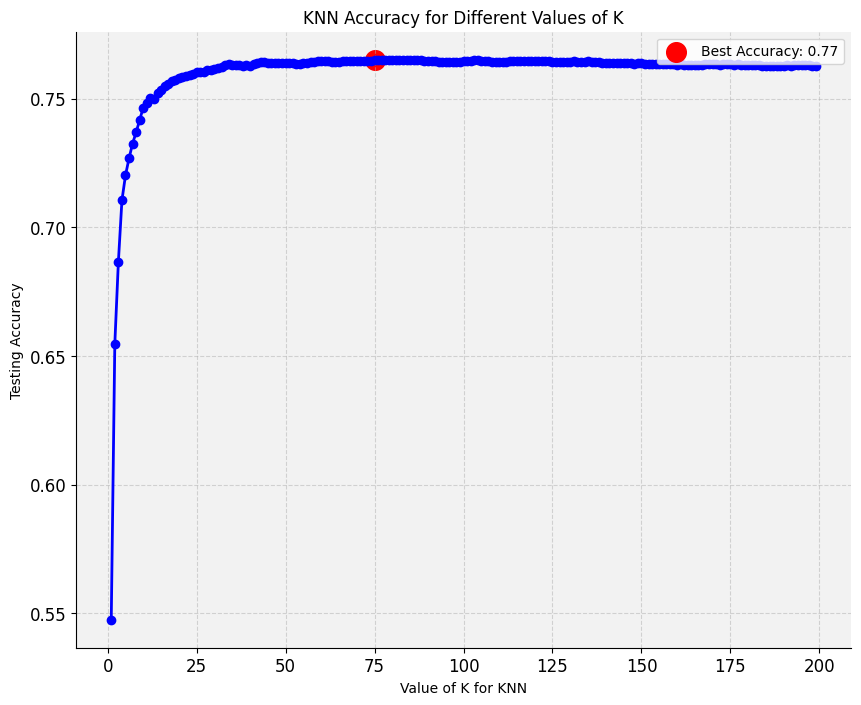

Predicted: 0.6180904522613065 Actual: 0
Predicted: 0.6683417085427136 Actual: 0
Predicted: 0.628140703517588 Actual: 1
Predicted: 0.6984924623115578 Actual: 1
Predicted: 0.7236180904522613 Actual: 1
Predicted: 0.6934673366834171 Actual: 1
Predicted: 0.7236180904522613 Actual: 1
Predicted: 0.6884422110552764 Actual: 1
Predicted: 0.8492462311557789 Actual: 0
Predicted: 0.6834170854271356 Actual: 0


In [47]:


# Train the KNN model and calculate accuracy for different values of K
k_range = np.arange(1, 200)
score_list = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    accuracy = 1 - mse  # Calculate accuracy (you can choose a different metric based on your needs)
    score_list.append(accuracy)

# Modify the plot appearance
plt.figure(figsize=(10, 8))
plt.plot(k_range, score_list, marker='o', linestyle='-', color='blue', linewidth=2)

# Add labels and title
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.title("KNN Accuracy for Different Values of K")

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add markers for the best accuracy
best_k = k_range[np.argmax(score_list)]
best_accuracy = np.max(score_list)
plt.scatter(best_k, best_accuracy, color='red', marker='o', s=200, label=f'Best Accuracy: {best_accuracy:.2f}')

# Add legend
plt.legend()

# Adjust the plot margins
plt.margins(0.05)

# Add a background color to the plot
plt.gca().set_facecolor('#F2F2F2')

# Add a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Increase the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

# Print the predicted/classified output
Y_test_array = np.array(Y_test)
for i in range(10):
    print("Predicted:", Y_pred[i], "Actual:", Y_test_array[i])


2. Decision Tree Classifier

Decision Tree Accuracy: 67.21795629060838


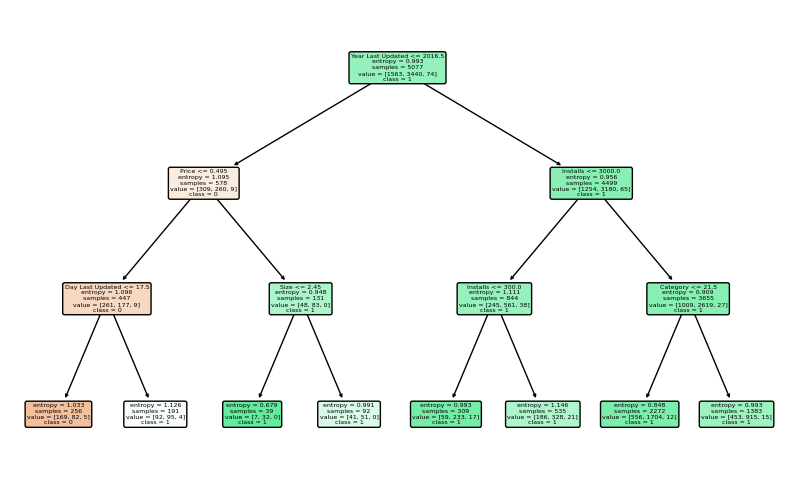

In [48]:

from sklearn import metrics

# Train the decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

dt_acc = metrics.accuracy_score(Y_test, y_pred)
print("Decision Tree Accuracy:", dt_acc * 100)

# Convert class names to strings
class_names = [str(c) for c in clf.classes_]

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X_train.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


3. Random Forest

Random Forest Accuracy: 68.87182516243355


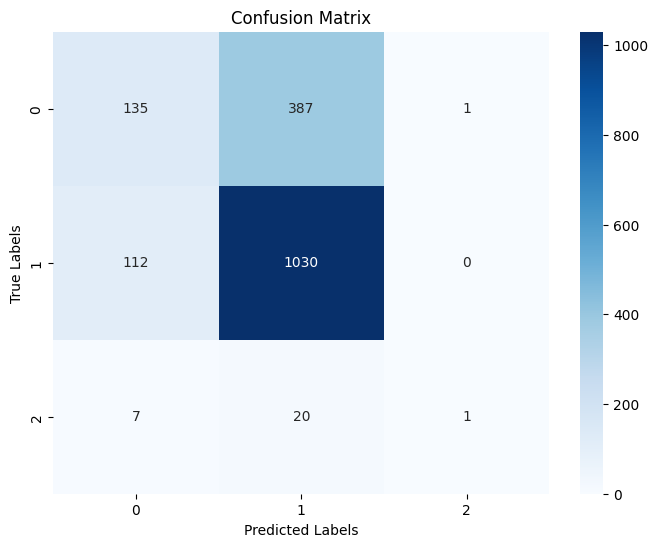

Predicted: 1 Actual: 0
Predicted: 1 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0


In [49]:


rdf_c=RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42)
rdf_c.fit(X_train,Y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(Y_test,rdf_pred)
rf_acc=accuracy_score(rdf_pred,Y_test)
print('Random Forest Accuracy:', rf_acc*100)

# Generate the confusion matrix
confusion_mat = confusion_matrix(Y_test, rdf_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Print the predicted/classified output
for i in range(10):
    print("Predicted:", rdf_pred[i], "Actual:", Y_test.iloc[i])

4. XGB Classifier

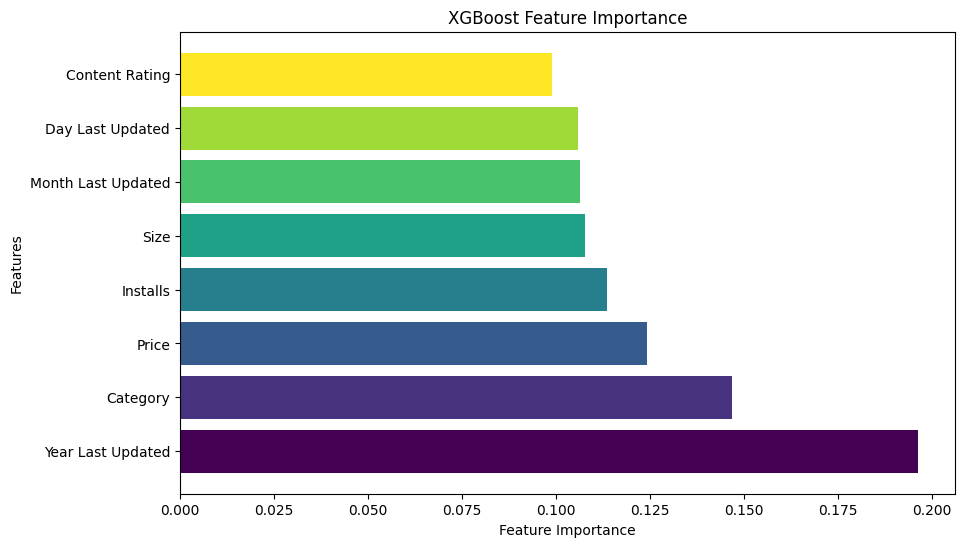

In [50]:


model = XGBClassifier()
model.fit(X_train, Y_train)

# Get feature importance
importance = model.feature_importances_
feature_names = X_train.columns

# Sort feature importance and feature names in descending order
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names_sorted)), importance_sorted, color=plt.cm.viridis(np.linspace(0, 1, len(feature_names_sorted))))
plt.yticks(range(len(feature_names_sorted)), feature_names_sorted)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")

# Show the plot
plt.show()


5. K-Mean Clustering

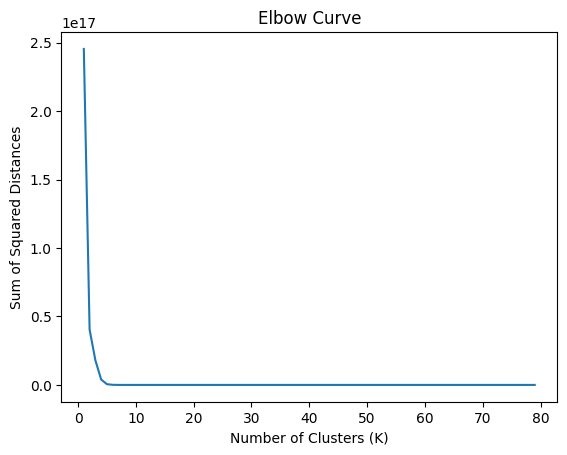

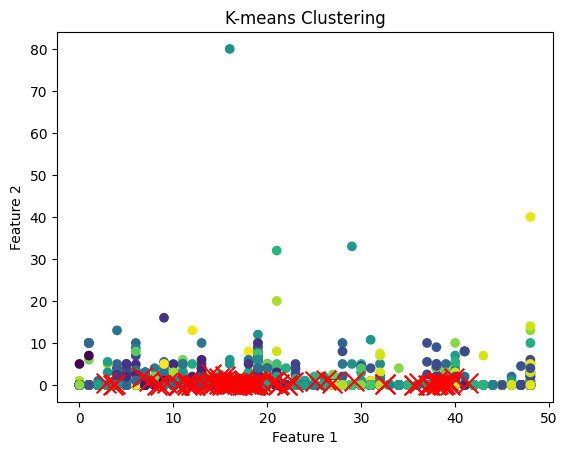

In [51]:
import warnings
from sklearn.cluster import KMeans

# Increase max_iter and set n_init explicitly to suppress the warning
kmeans = KMeans(n_clusters= k, max_iter=1000, n_init=10)

# Disable the warning about n_init in scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning)

# Fit the KMeans model
kmeans.fit(X_train)
# Finding the optimal number of clusters (K)
k_range = range(1, 80)
score = {}
score_list = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score[k] = kmeans.inertia_
    score_list.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, score_list)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Convert X_train to a NumPy array
X_train_array = X_train.values

# Create a scatter plot of the data points, colored by cluster
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='viridis')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=200)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Show the plot
plt.show()




# Data Viz

1. App Ratings across different Categories

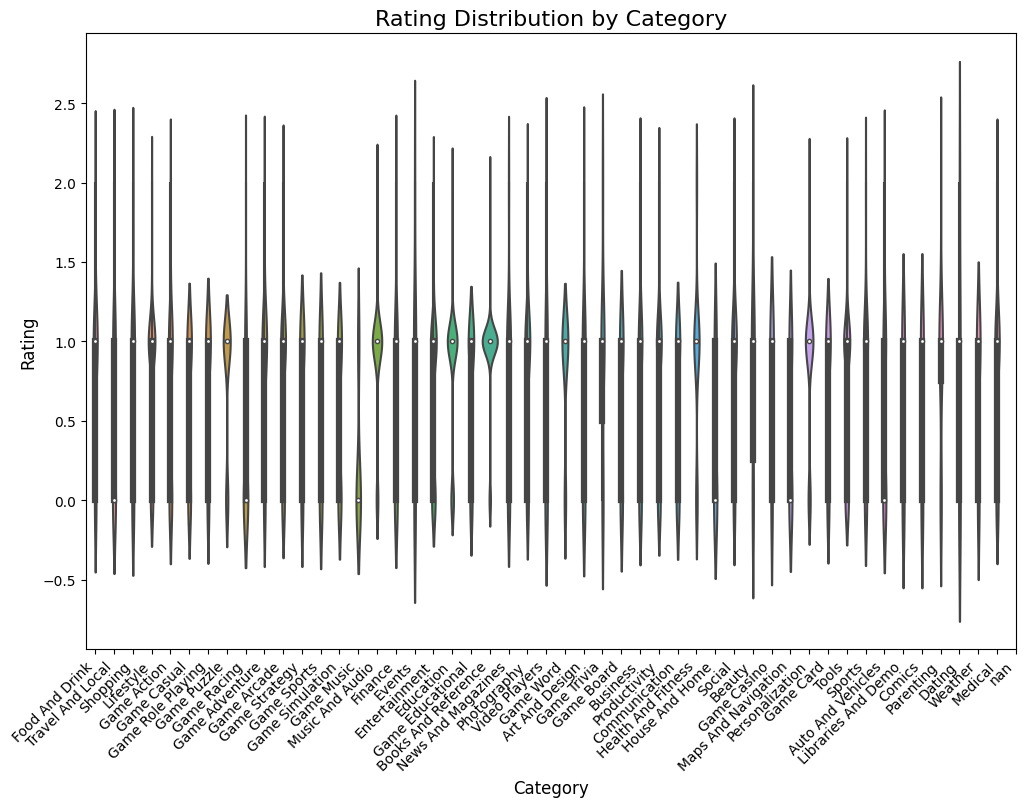

In [52]:
# Create a violin plot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x='Category', y='App_Rating', data=df)

# Set the tick positions and labels
ax.set_xticks(np.arange(len(original_categories)))
ax.set_xticklabels(original_categories, rotation=45, ha='right')

# Set plot title, x-axis label, and y-axis label
plt.title('Rating Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Show the plot
plt.show()


2. Distribution of Content Ratings for Apps.

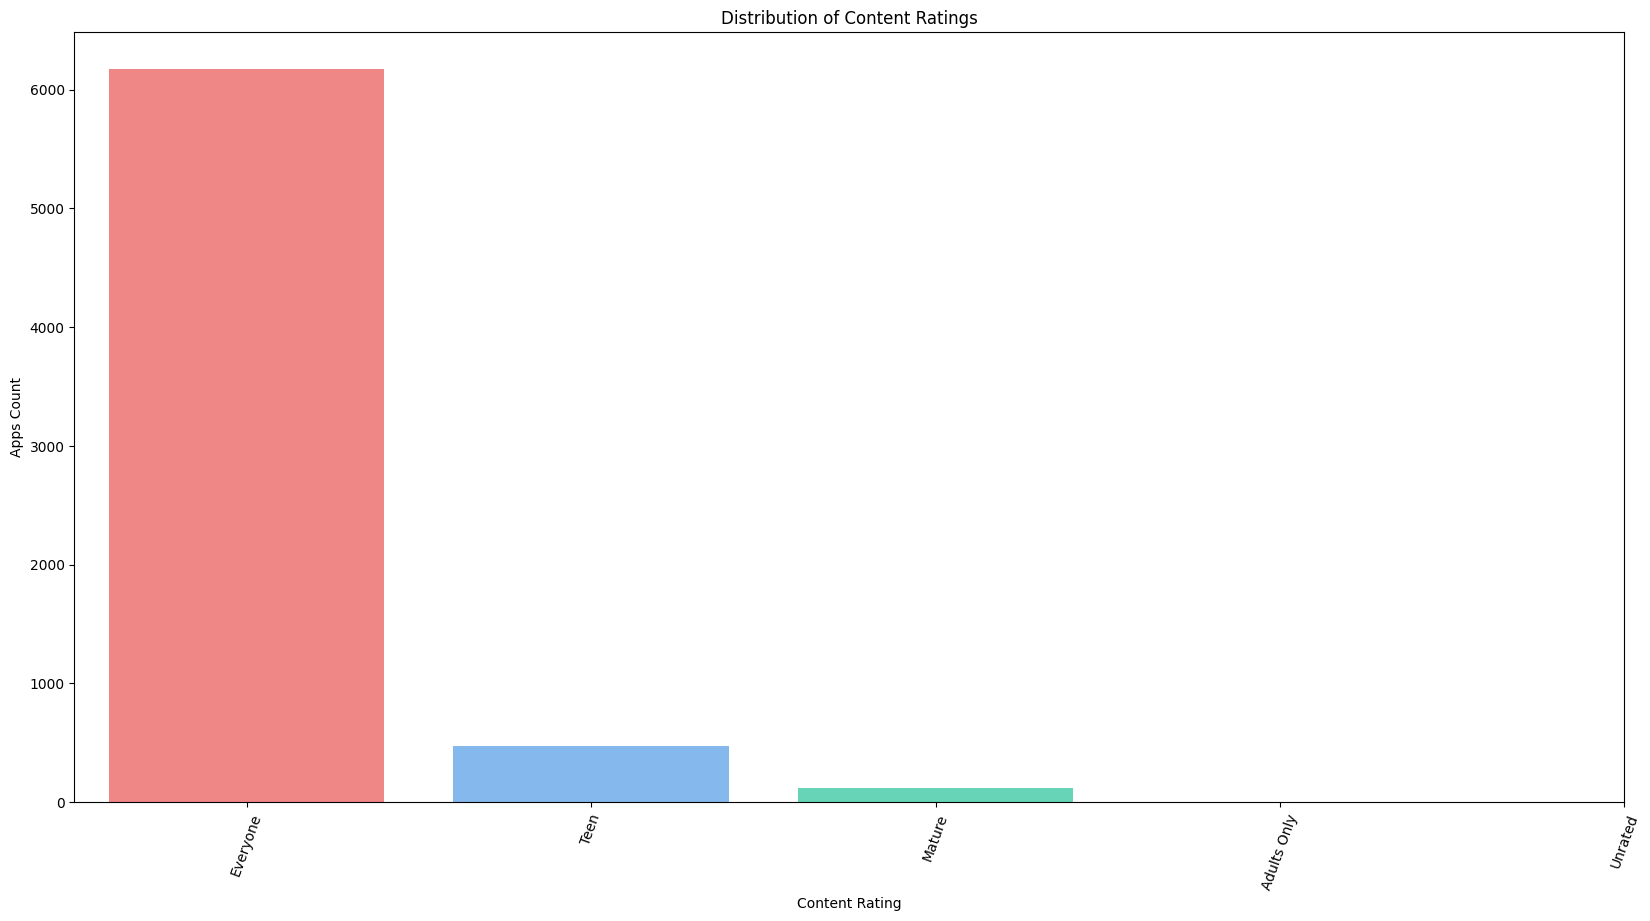

In [53]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Define a custom color palette
color_palette = ['#FF7675', '#74B9FF', '#55E6C1', '#F9CA24', '#D63031']

# Create the countplot
ax = sns.countplot(x='Content Rating', data=df, palette=color_palette)

# Get the tick positions
tick_positions = np.arange(len(unique_content_rating))

# Set the tick positions and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(unique_content_rating, rotation=70)

# Add a title and labels to the chart
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Apps Count')

# Show the plot
plt.show()


3.  Frequency of Updates over the Years.

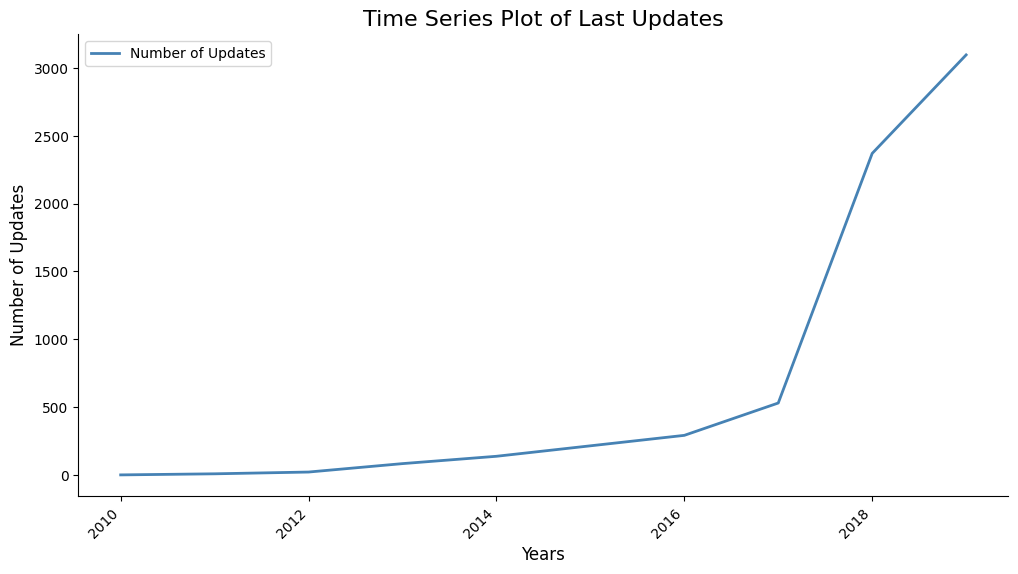

In [54]:
#  Set the figure size
plt.figure(figsize=(12, 6))

# Get the value counts of the 'Updated_Year' column
freq = df['Year Last Updated'].value_counts()

# Create the time series plot
ax = freq.plot(color='steelblue', linewidth=2)

# Set x-axis label
plt.xlabel("Years", fontsize=12)

# Set y-axis label
plt.ylabel("Number of Updates", fontsize=12)

# Set plot title
plt.title("Time Series Plot of Last Updates", fontsize=16)

# Customize the tick labels
plt.xticks(rotation=45, ha='right')

# Customize the plot colors
ax.set_facecolor('whitesmoke')

# Add a background color to the plot area
ax.set_axisbelow(True)
ax.patch.set_facecolor('white')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a legend
plt.legend(['Number of Updates'])

# Display the plot
plt.show()


4. Frequency of Updates over the Months. 

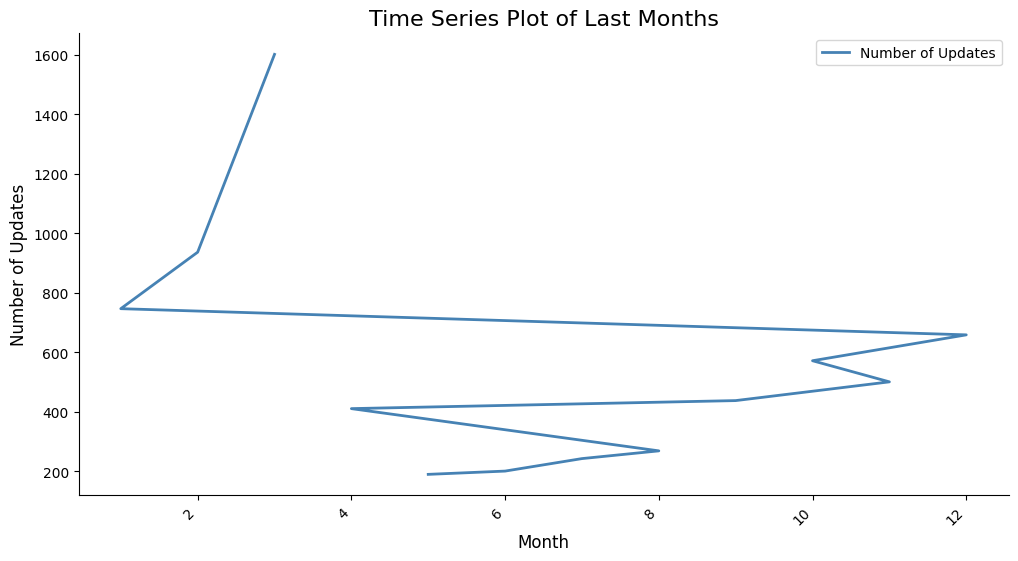

In [55]:
#  Set the figure size
plt.figure(figsize=(12, 6))

# Get the value counts of the 'Updated_Year' column
freq = df['Month Last Updated'].value_counts()

# Create the time series plot
ax = freq.plot(color='steelblue', linewidth=2)

# Set x-axis label
plt.xlabel("Month", fontsize=12)

# Set y-axis label
plt.ylabel("Number of Updates", fontsize=12)

# Set plot title
plt.title("Time Series Plot of Last Months", fontsize=16)

# Customize the tick labels
plt.xticks(rotation=45, ha='right')

# Customize the plot colors
ax.set_facecolor('whitesmoke')

# Add a background color to the plot area
ax.set_axisbelow(True)
ax.patch.set_facecolor('white')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a legend
plt.legend(['Number of Updates'])

# Display the plot
plt.show()


5. Frequency of Installs over the Months. 

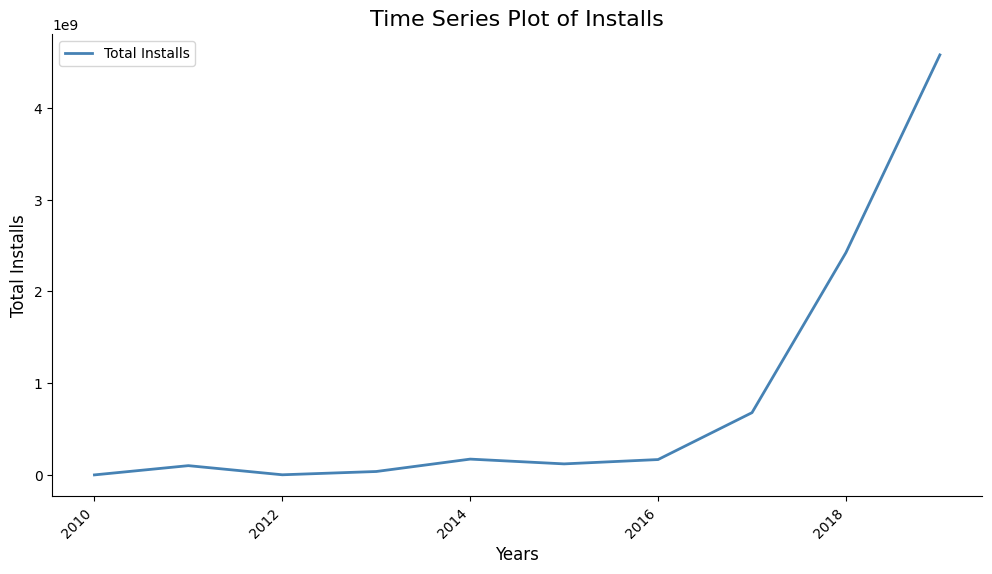

In [56]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Group the data by 'Year Last Updated' and sum the installs
install_counts = df.groupby('Year Last Updated')['Installs'].sum()

# Create the time series plot
ax = install_counts.plot(color='steelblue', linewidth=2)

# Set x-axis label
plt.xlabel("Years", fontsize=12)

# Set y-axis label
plt.ylabel("Total Installs", fontsize=12)

# Set plot title
plt.title("Time Series Plot of Installs", fontsize=16)

# Customize the tick labels
plt.xticks(rotation=45, ha='right')

# Customize the plot colors
ax.set_facecolor('whitesmoke')

# Add a background color to the plot area
ax.set_axisbelow(True)
ax.patch.set_facecolor('white')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a legend
plt.legend(['Total Installs'])

# Display the plot
plt.show()


6. Top 10 Categories

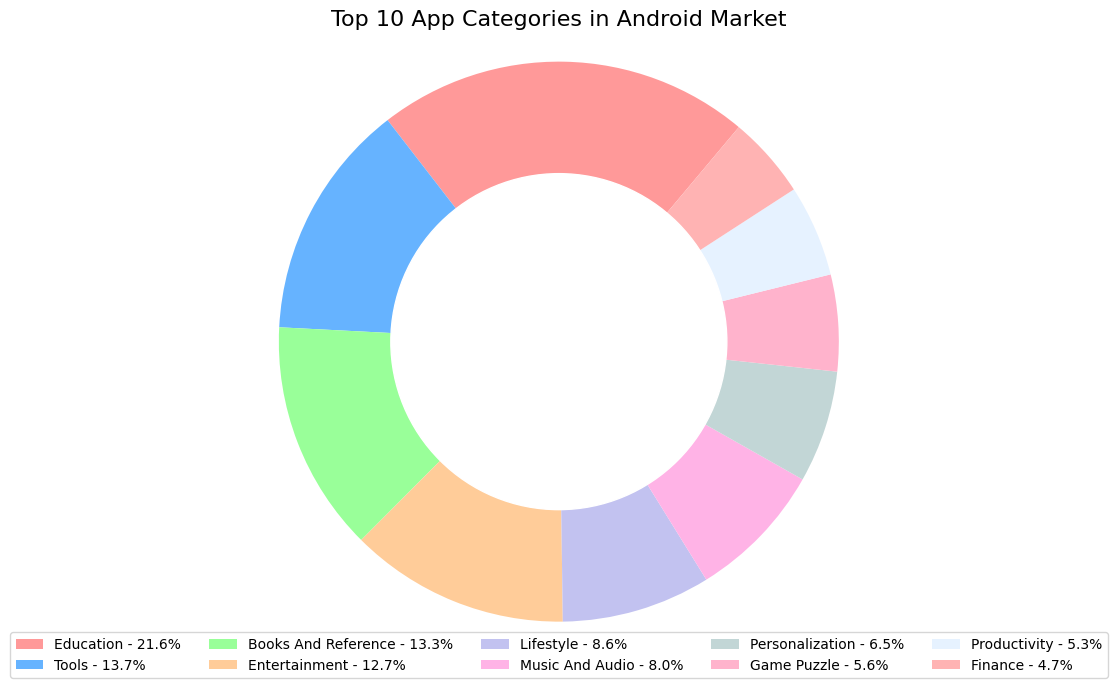

In [57]:
# Count the number of apps in each category
category_counts = df['Category'].value_counts().head(10)

# Get the labels and sizes for the pie chart
labels = original_categories[category_counts.index]
sizes = category_counts.values

# Calculate the percentages and sort the labels and sizes accordingly
percentages = sizes / sum(sizes) * 100
sorted_indices = np.argsort(percentages)[::-1]
labels = labels[sorted_indices]
sizes = sizes[sorted_indices]
percentages = percentages[sorted_indices]

# Define custom colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2d6d6', '#ffb3cc', '#e6f2ff', '#ffb3b3']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the pie chart with custom colors
patches, _ = plt.pie(sizes, colors=colors, startangle=50)

# Create a list of label strings with color and percentage information
label_strings = [f"{label} - {percentage:.1f}%" for label, percentage in zip(labels, percentages)]

# Set the label strings as custom labels for the pie chart
plt.legend(patches, label_strings, loc="upper center", bbox_to_anchor=(0.5, 0.04), ncol=5)

# Set plot title
plt.title("Top 10 App Categories in Android Market", fontsize=16)

# Add a shadow to the pie chart
plt.gca().set_aspect("equal")
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

7. App Rating across top 12 Categories

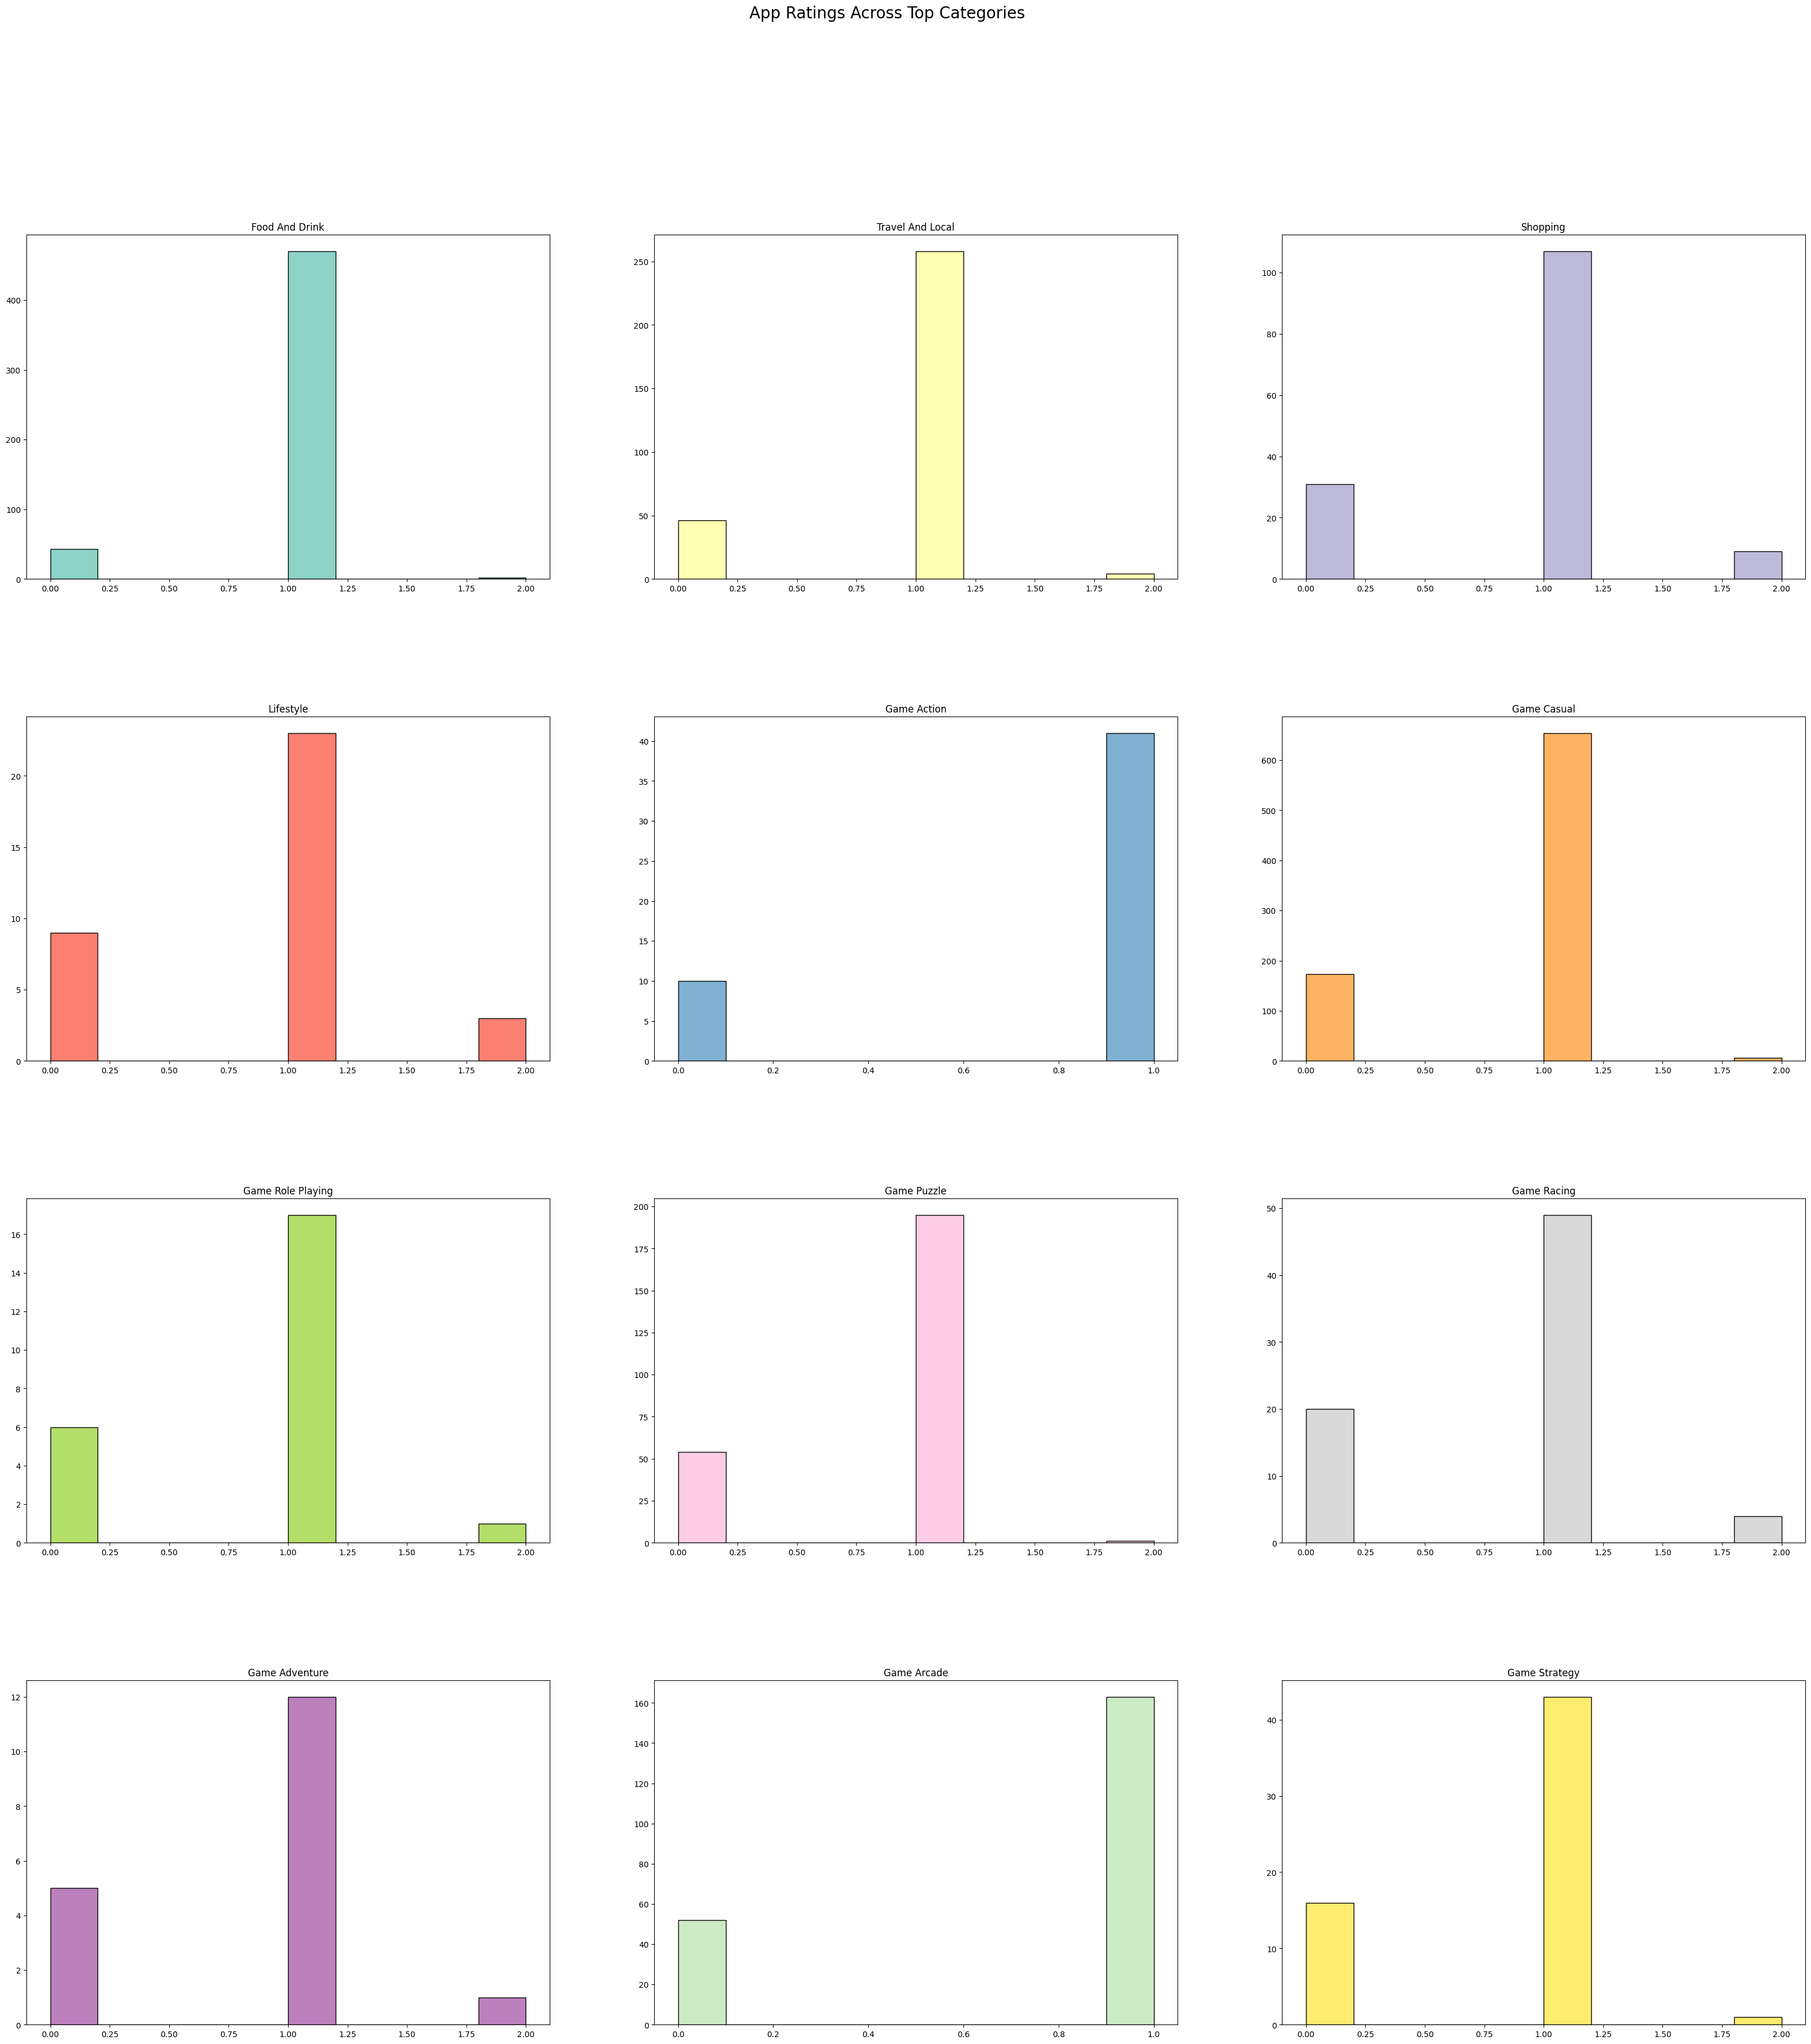

In [58]:
# Calculate the mean rating for each category and sort in descending order
top_categories = df.groupby('Category')['App_Rating'].mean().sort_values(ascending=False).head(12).index
filtered_df = df[df['Category'].isin(top_categories)]

# Set the number of rows and columns for the subplots
num_rows = 4
num_cols = 3

# Create a figure and subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define a categorical color palette for the categories
palette = sns.color_palette('Set3', len(top_categories))

# Iterate over the categories and create a histogram chart for each category
for i, category in enumerate(top_categories):
    # Filter the data for the current category
    category_data = filtered_df[filtered_df['Category'] == category]

    # Create a histogram chart for the ratings in the current category
    axes[i].hist(category_data['App_Rating'], bins=10, edgecolor='black', color=palette[i])

    # Set the title for the subplot
    axes[i].set_title(original_categories[i])

     # Set the y-axis label
    # axes[i].set_ylabel('Ratings Count')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, bottom=0.1)

# Set a title for the overall chart
plt.suptitle('App Ratings Across Top Categories', fontsize=20)

# Show the main chart
plt.show()


8. Distribution of Free and Paid Apps    

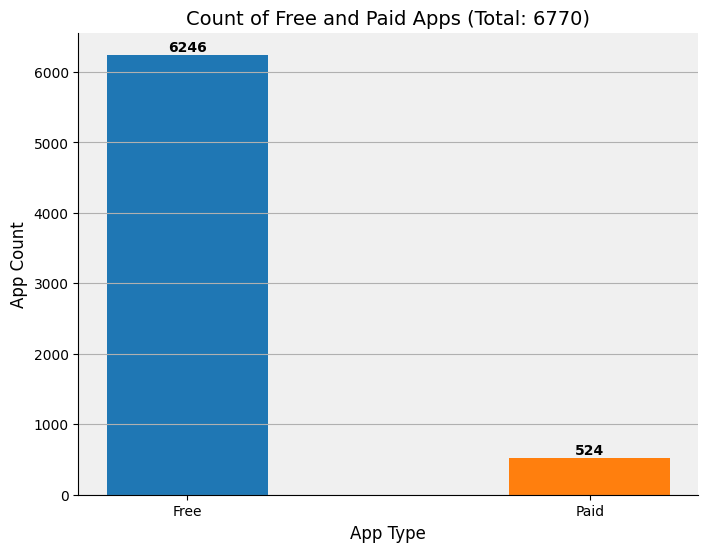

In [59]:
# Count the occurrences of free and paid apps
free_count = df[df['Price'] == 0]['Price'].count()
paid_count = df[df['Price'] > 0]['Price'].count()

# Calculate the total number of apps
total_apps = df['Price'].count()

# Create the bar chart
labels = ['Free', 'Paid']
counts = [free_count, paid_count]

# Set custom colors for the bars
colors = ['#1f77b4', '#ff7f0e']

# Adjust the width of the bars
bar_width = 0.4

# Create a figure and axis with larger dimensions
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the bar chart
ax.bar(labels, counts, width=bar_width, color=colors)

# Set axis labels and title
ax.set_xlabel('App Type', fontsize=12)
ax.set_ylabel('App Count', fontsize=12)
ax.set_title('Count of Free and Paid Apps (Total: {})'.format(total_apps), fontsize=14)

# Add data labels above each bar
for i, count in enumerate(counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show grid lines on the y-axis
ax.yaxis.grid(True)

# Adjust the tick label font size
ax.tick_params(axis='both', labelsize=10)

# Customize the plot background color
ax.set_facecolor('#f0f0f0')

# Display the chart
plt.show()

9. Distribution of App Ratings, Size & Year Last Update between Free and Paid apps.

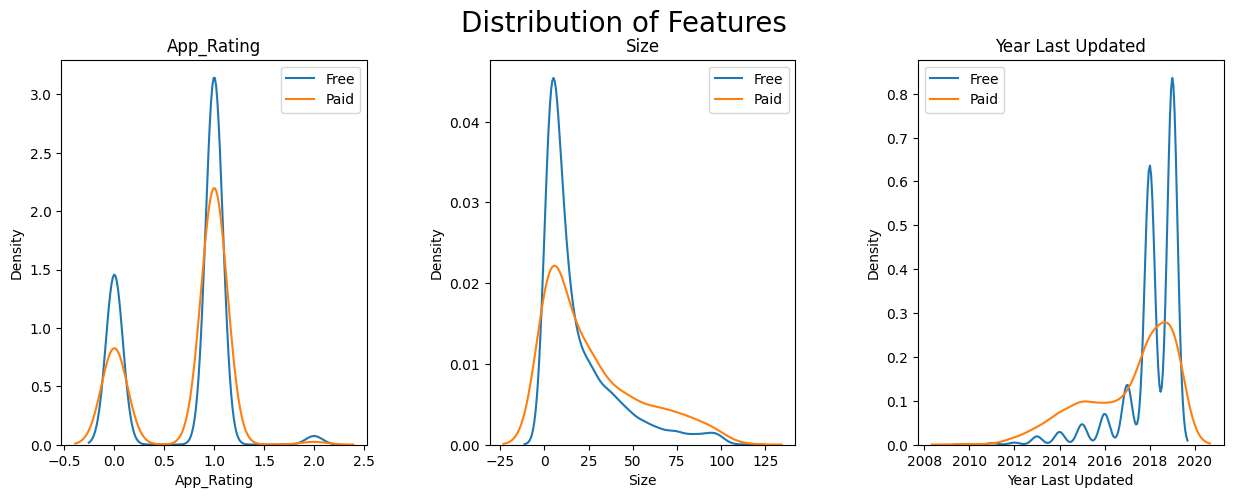

In [60]:
# # Set the figure size and create subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

# # Define the features to plot
features = ['App_Rating', 'Size', 'Year Last Updated']

# Create the 'Types' column based on the 'Price' values
df['Types'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')
#
# Get the unique types from the 'Types' column
types = df['Types'].unique()

# Iterate over the features and create individual KDE plots
for i, feature in enumerate(features):
    ax = axes[i]  # Select the current subplot

    for t in types:
        sns.kdeplot(data=df[df['Types'] == t], x=feature, label=t, ax=ax, warn_singular=False)

    ax.set_title(feature)  # Set subplot title
    ax.legend()  # Add legend

# Adjust spacing between subplots and subplot label spacing
plt.subplots_adjust(wspace=0.4)

# Add chart label for the main plot
plt.suptitle('Distribution of Features', fontsize=20)

# Display the chart
plt.show()


10. Distribution of Installs by App Type

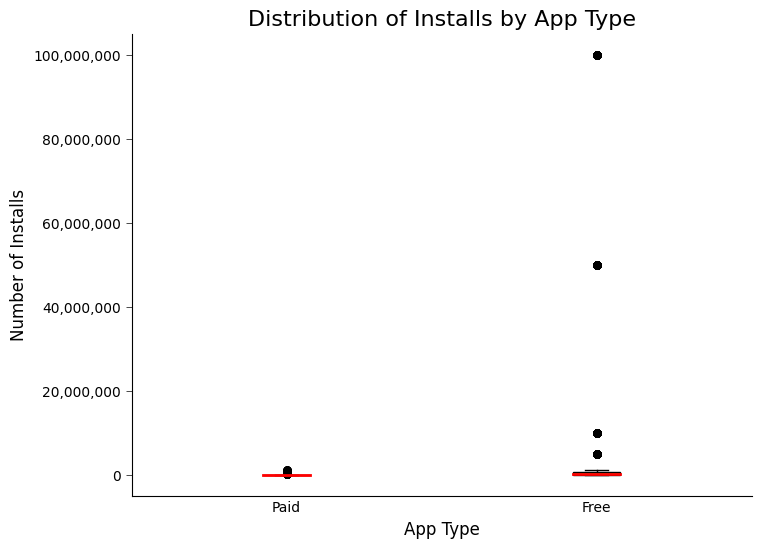

In [61]:

# Filter the data by price
paid_apps = df[df['Types'] == 'Paid']
free_apps = df[df['Types'] == 'Free']

# Create a combined dataset for box plot
data = [paid_apps['Installs'], free_apps['Installs']]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot
bp = ax.boxplot(data, labels=['Paid', 'Free'], patch_artist=True)

# Set the box colors
box_colors = ['royalblue', 'limegreen']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Set the whisker colors
whisker_colors = ['black', 'black']
for whisker, color in zip(bp['whiskers'], whisker_colors):
    whisker.set(color=color, linewidth=1.5, linestyle='-')

# Set the median line colors
median_colors = ['red', 'red']
for median, color in zip(bp['medians'], median_colors):
    median.set(color=color, linewidth=2)

# Set the outlier marker style and color
outlier_marker = dict(marker='o', markerfacecolor='black', markersize=5, linestyle='none')

# Set the outlier properties for each dataset
for flier, color in zip(bp['fliers'], box_colors):
    flier.set(markerfacecolor=color)
    flier.set(**outlier_marker)

# Add labels and title to the plot
ax.set_xlabel('App Type', fontsize=12)
ax.set_ylabel('Number of Installs', fontsize=12)
ax.set_title('Distribution of Installs by App Type', fontsize=16)

# Customize the y-axis tick labels
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Adjust the plot aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=4, width=0.5)

# Show the plot
plt.show()


11. Pricing trend across Categories 

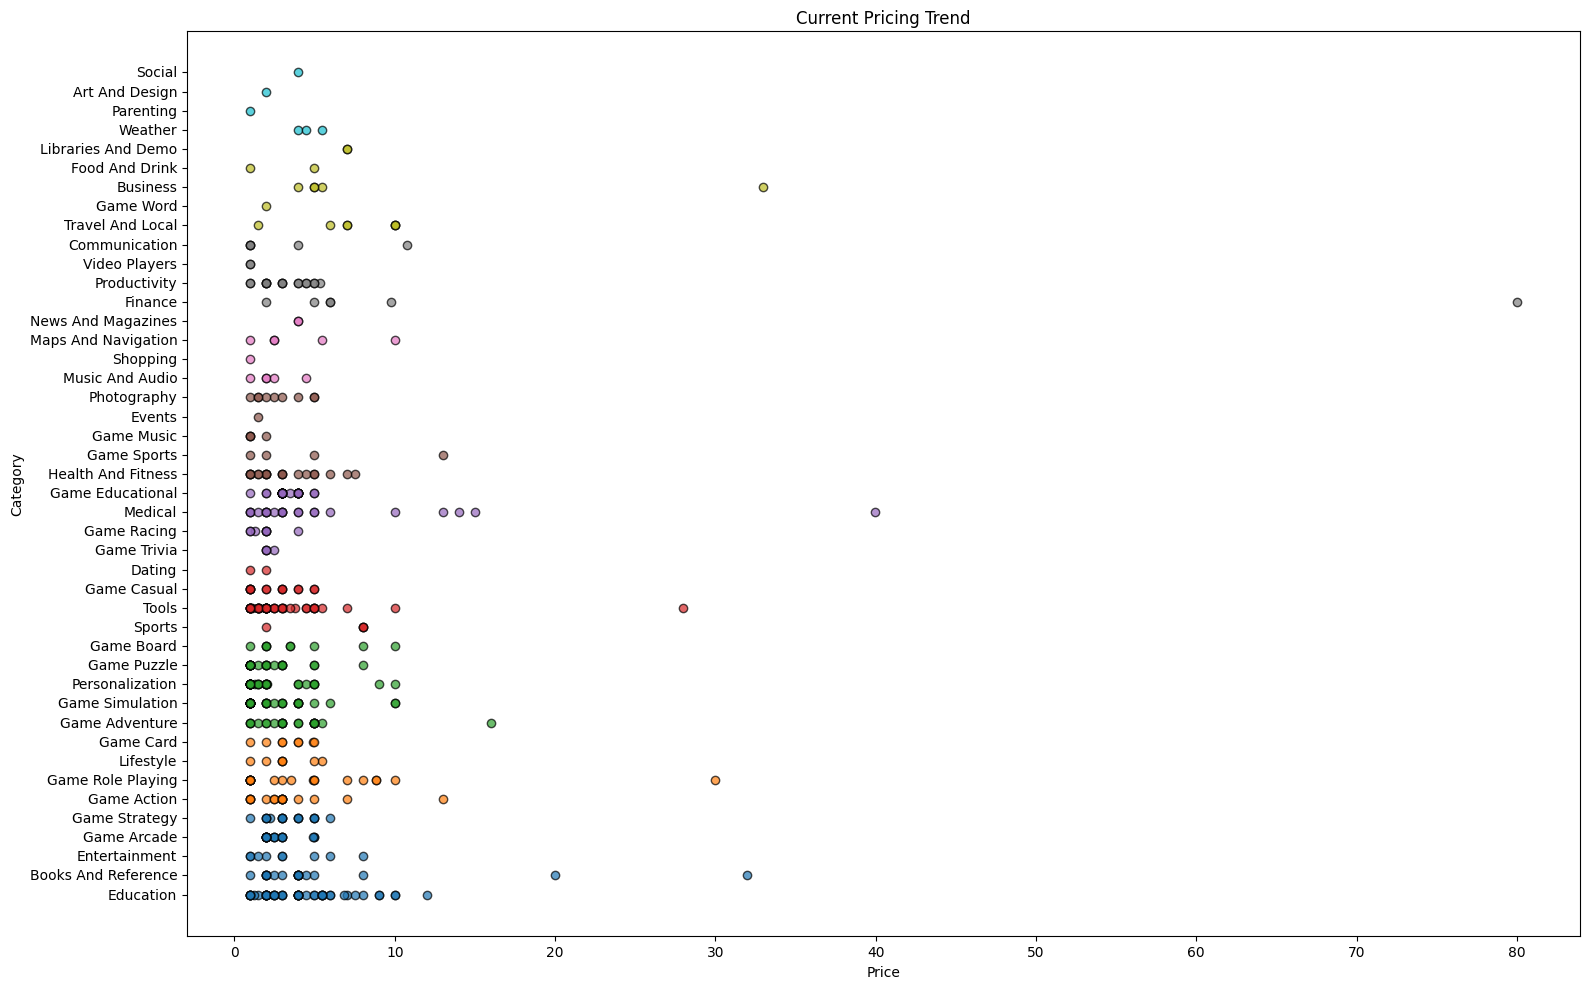

In [62]:
# Prepare the Data
filtered_df = df[df['Price'] > 0]  # Filter out apps with price <= 0
categories = filtered_df['Category'].unique()
num_categories = len(categories)
colors = plt.cm.tab10(np.linspace(0, 1, num_categories * 2))  # Generate a color map with double the number of colors

# Create the Scatter Plot
plt.figure(figsize=(16, 10))  # Increase the figure size

scatter_plots = []  # List to store scatter plots
for i, category in enumerate(categories):
    category_data = filtered_df[filtered_df['Category'] == category]
    category_name = original_categories[category]  # Get the original category name
    color_index = i * 2  # Double the color index to select a different color from the color map
    scatter = plt.scatter(category_data['Price'], [category_name] * len(category_data), alpha=0.7, edgecolor='black', color=colors[color_index])
    scatter_plots.append(scatter)  # Add scatter plot to the list

plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Current Pricing Trend')
plt.yticks(rotation=0, va='center')  # Center the category names along the y-axis

plt.tight_layout()  # Adjust the spacing between the labels if necessary

# Show the Scatter Plot
plt.show()

